# LetsGrowMore

TASK 7: DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING

DONE BY: MEERA P V

### IMPORT REQUIRED LIBRARIES

In [1]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### IMPORT DATASET

In [2]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


### VISUALISATION

C:\Users\meera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


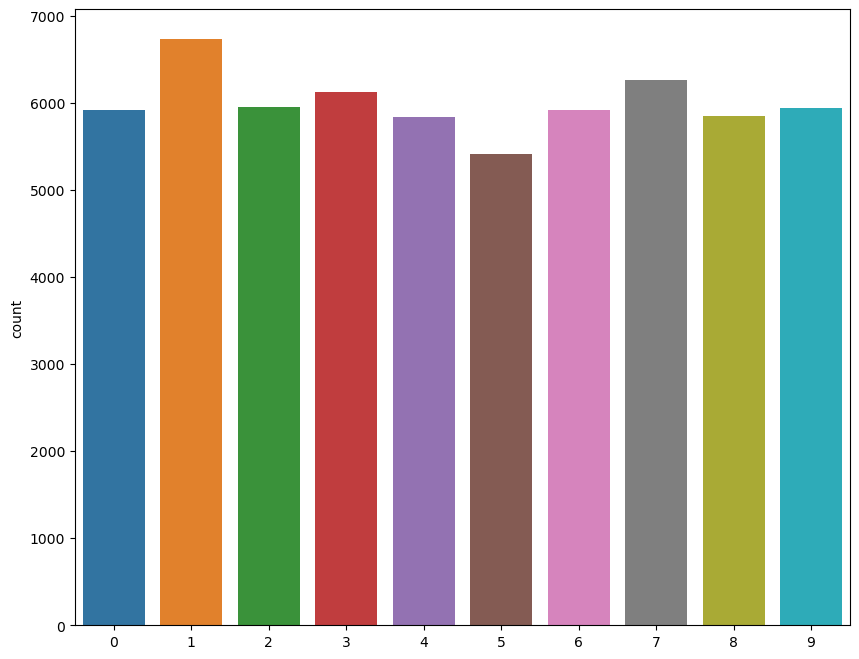

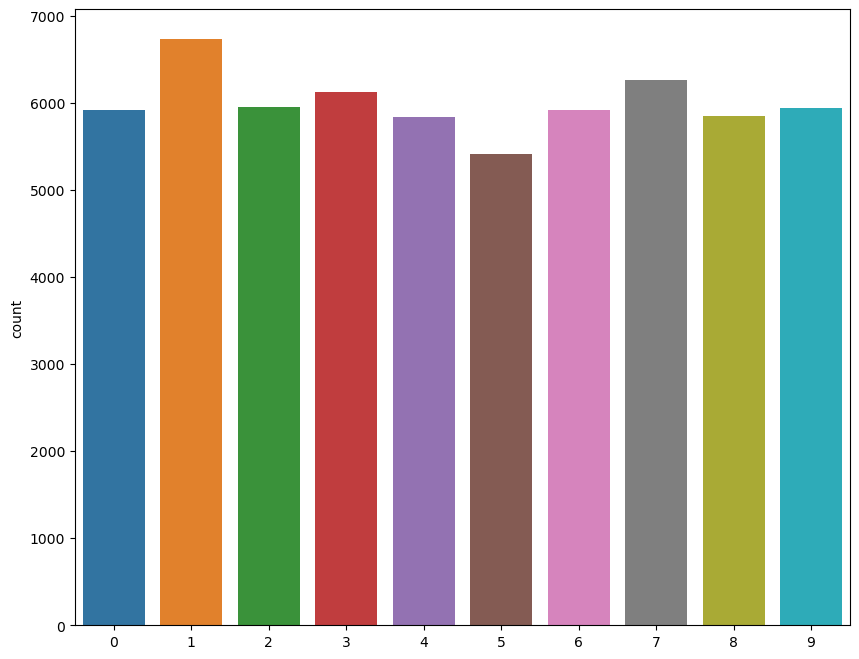

In [4]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)
plt.show()

### VIEW IMAGE

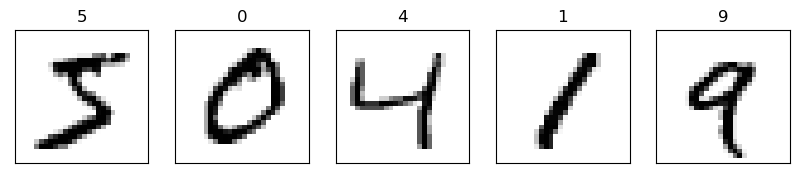

In [5]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### PRE-PROCESSING DATA

In [6]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### MODEL ARCHITECTURE

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

Conv2D - for the convolution layers
Dropout - to prevent overfitting
Dense - a fully connected layer
Softmax activation - This is used to convert all predictions into probability
The model architecture can be tuned to get optimal performance

so i am going to create a model with



##### CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### TRAINING THE MODEL

In [12]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 541s 319ms/step - loss: 0.2624 - accuracy: 0.9223 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 2/10
1688/1688 [==============================] - 584s 346ms/step - loss: 0.1095 - accuracy: 0.9681 - val_loss: 0.0927 - val_accuracy: 0.9800
Epoch 3/10
1688/1688 [==============================] - 532s 315ms/step - loss: 0.0891 - accuracy: 0.9732 - val_loss: 0.1066 - val_accuracy: 0.9807
Epoch 4/10
1688/1688 [==============================] - 539s 319ms/step - loss: 0.0755 - accuracy: 0.9779 - val_loss: 0.1044 - val_accuracy: 0.9832
Epoch 5/10
1688/1688 [==============================] - 552s 327ms/step - loss: 0.0631 - accuracy: 0.9823 - val_loss: 0.1495 - val_accuracy: 0.9798
Epoch 6/10
1688/1688 [==============================] - 554s 328ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0984 - val_accuracy: 0.9847
Epoch 7/10
1688/1688 [==============================] - 547s 324ms/step - loss: 0.0535 - accuracy: 0.9844 - val_

### SAVE AND LOAD MODEL

In [13]:
model.save('Mnistproject.h5')

In [15]:
from tensorflow.keras.models import load_model
model = load_model('Mnistproject.h5')

### EVALUATING MODEL

In [16]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 13s 40ms/step - loss: 2.7368 - accuracy: 0.9889
Test Loss 2.736800193786621
Test Accuracy 0.9889000058174133


### PLOT TRAINING AND VALIDATION PLOTS

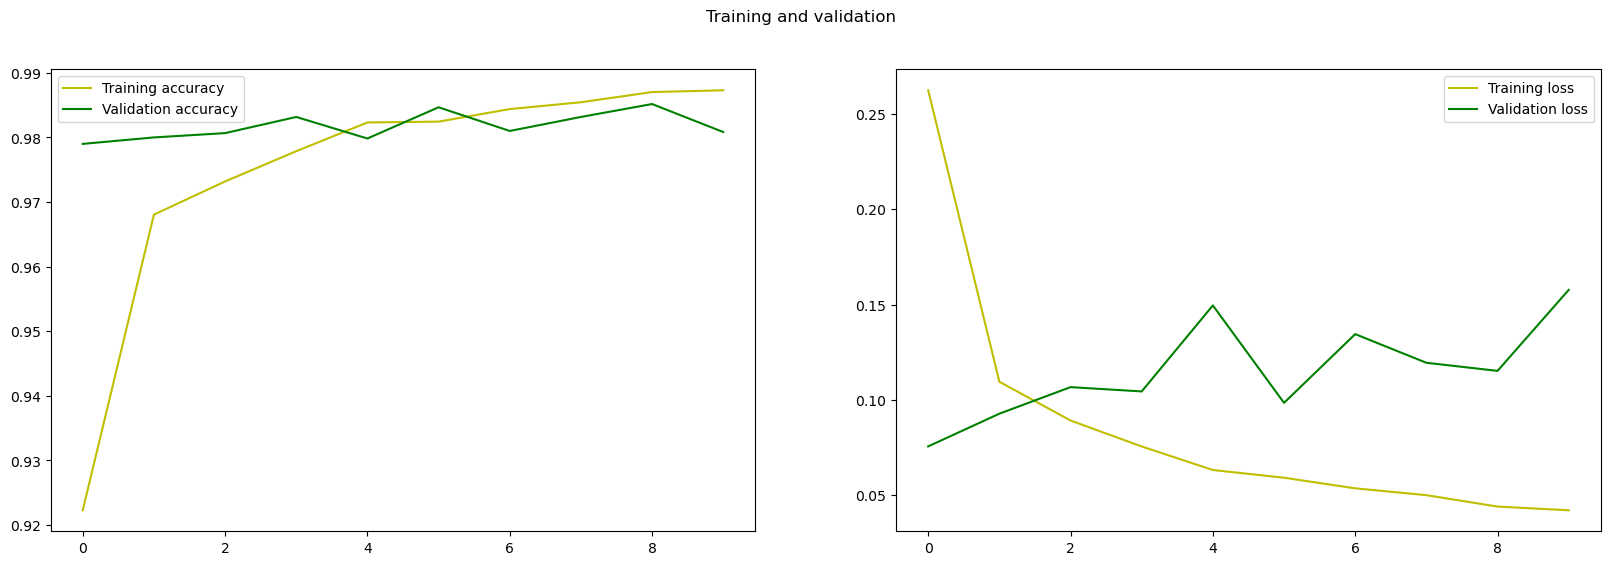

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [18]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    0,    2,    0,    4,    1,    4,    0],
       [   0, 1129,    2,    0,    0,    1,    1,    2,    0,    0],
       [   1,    3, 1021,    1,    3,    0,    0,    3,    0,    0],
       [   0,    0,    5,  997,    1,    2,    0,    4,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   2,    0,    0,    4,    1,  870,    8,    1,    1,    5],
       [   2,    2,    1,    0,    4,    1,  947,    0,    1,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1021,    1,    0],
       [   0,    0,    0,    1,    1,    0,    0,    3,  967,    2],
       [   1,    0,    0,    0,   11,    0,    0,    3,    5,  989]])>

### PLOT HEAT MAP

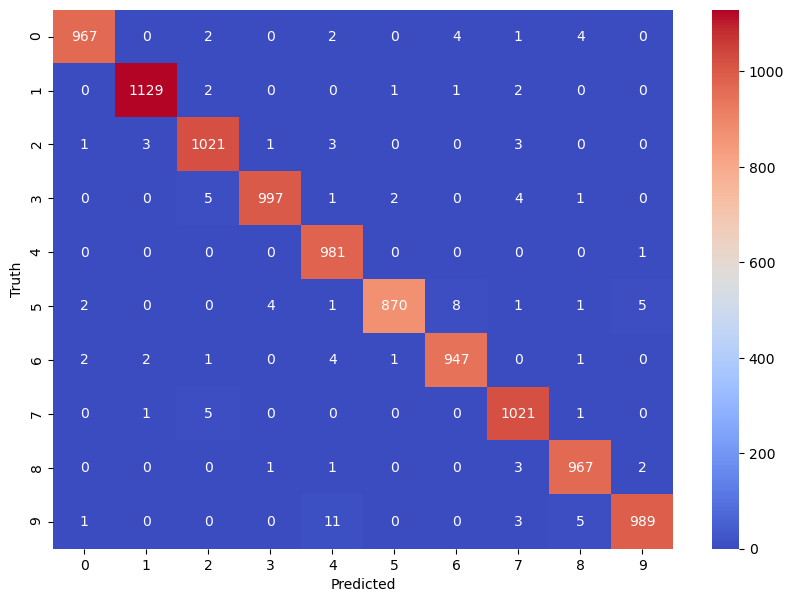

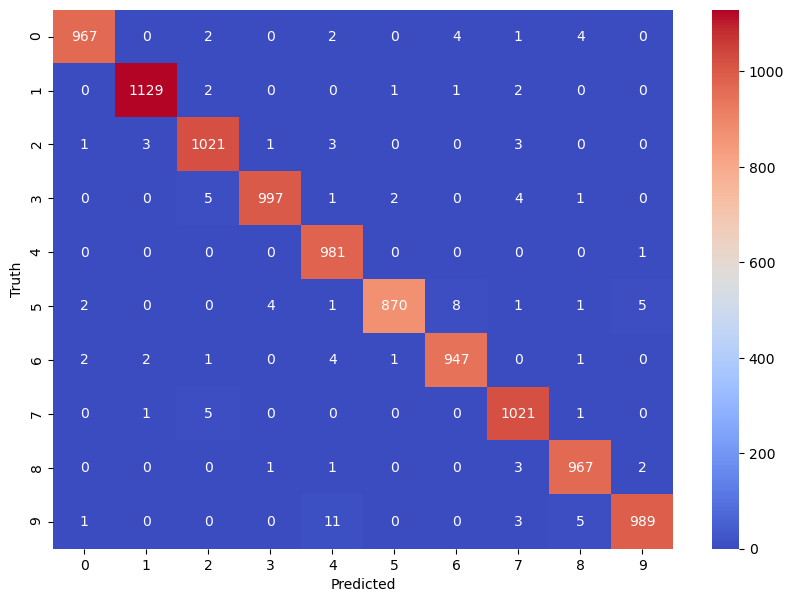

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### MODEL TESTING

Predicted Value:  1
Successful prediction


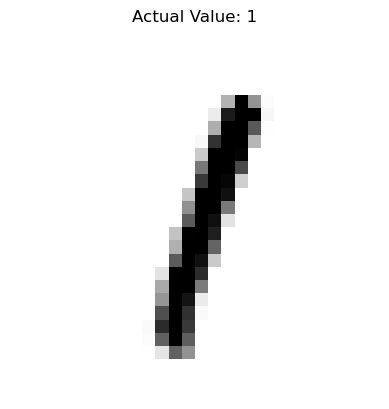

In [25]:
# Testing the Model
plt.imshow(x_test[5],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[5]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[5]))
if(y_test[5]==(np.argmax(prediction[5]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')
plt.show()

Predicted Value:  4
Successful prediction


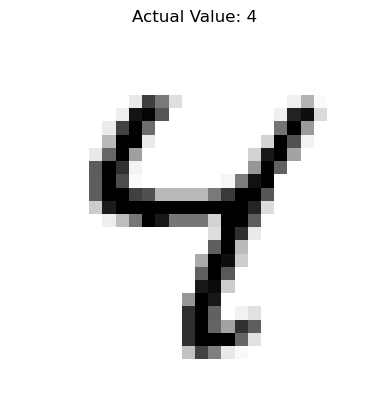

In [26]:
plt.imshow(x_test[6],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[6]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[6]))
if(y_test[6]==(np.argmax(prediction[6]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')
plt.show()

# THANK YOU!!!